## 作业一
导入“FremontBridge.csv”和“BicycleWeather.csv”两个数据集，利用`dfply`模块完成数据处理。（请参考[dfply文档](https://github.com/kieferk/dfply)）

In [1]:
import pandas as pd
counts = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [2]:
daily = counts.resample('d').sum()
daily["date"] = daily.index

In [3]:
daily.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,date
Date,,,
2012-10-03,1761.0,1760.0,2012-10-03
2012-10-04,1767.0,1708.0,2012-10-04
2012-10-05,1590.0,1558.0,2012-10-05
2012-10-06,926.0,1080.0,2012-10-06
2012-10-07,951.0,1191.0,2012-10-07


In [4]:
from dfply import *

1. 用`rename`函数将两列重命名为`east`和`west`。

In [7]:
daily >>= rename(east='Fremont Bridge East Sidewalk',west='Fremont Bridge West Sidewalk')

2. 用`mutate`函数将两列数字加总，添加新的一列`Total`。

In [9]:
daily >>= mutate(Total=X.east+X.west)

3. 用`select`函数，使保留`Total`列，去除`east`和`west`两列。

In [10]:
daily >> select(X.Total)

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0
...,...
2018-10-27,1097.0
2018-10-28,633.0
2018-10-29,3173.0


4. 用`mutate`函数，加入`annual`列，告诉我们每一天离第一天经过了多少年。

In [25]:
from datetime import timedelta
daily >> mutate(annual = (X.date - X.date[0])/timedelta(days=365)) 

,east,west,date,Total,annual
Date,,,,,
2012-10-03,1761.0,1760.0,2012-10-03,3521.0,0.000000
2012-10-04,1767.0,1708.0,2012-10-04,3475.0,0.002740
2012-10-05,1590.0,1558.0,2012-10-05,3148.0,0.005479
2012-10-06,926.0,1080.0,2012-10-06,2006.0,0.008219
2012-10-07,951.0,1191.0,2012-10-07,2142.0,0.010959
...,...,...,...,...,...
2018-10-27,561.0,536.0,2018-10-27,1097.0,6.068493
2018-10-28,297.0,336.0,2018-10-28,633.0,6.071233
2018-10-29,1242.0,1931.0,2018-10-29,3173.0,6.073973


5. 用`mutate`函数在`weather`数据中加入一列，代表一天的平均气温；并将代表降水量的`PRCP`列转换为原来的$1/254$；最后添加新列`DryDay`表示每一天有无降水。

## 作业二
文件“FlorentineFamily.txt”中的边列表代表15世纪佛罗伦萨的婚姻关系网络，请完成针对该社会网络的初步分析。
1. 用networkx模块，以边列表的形式读取“FlorentineFamily.txt”文件构造一个无向图。

In [30]:
import networkx as nx
g = nx.read_edgelist('FlorentineFamily.txt')

2. 将构造的图可视化。

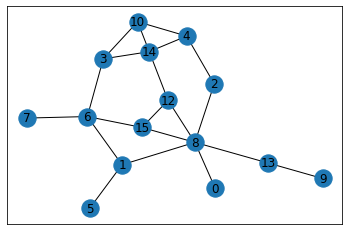

In [44]:
%matplotlib inline
nx.draw_networkx(g)

3. 计算平均度，并将度分布可视化。

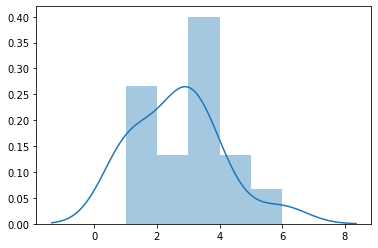

In [42]:
np.mean([v for k,v in g.degree()])
import seaborn as sns
sns.distplot([v for k,v in g.degree()])

4. 计算每一个节点的集聚系数，将其存入一个字典，键值对的格式为：节点:该节点的集聚系数。（注意，节点是字符串而不是数字）

In [43]:
nx.clustering(g)

{'0': 0,
 '8': 0.06666666666666667,
 '1': 0,
 '5': 0,
 '6': 0,
 '2': 0,
 '4': 0.3333333333333333,
 '3': 0.3333333333333333,
 '10': 0.6666666666666666,
 '14': 0.3333333333333333,
 '7': 0,
 '15': 0.3333333333333333,
 '12': 0.3333333333333333,
 '13': 0,
 '9': 0}

5. 分别计算图中节点的中介中心性、接近中心性和特征向量中心性，并对结果进行排序。查看按照不同的中心性定义，结果是否相同？

In [46]:
nx.betweenness_centrality(g)

{'0': 0.0,
 '8': 0.521978021978022,
 '1': 0.2124542124542125,
 '5': 0.0,
 '6': 0.25457875457875456,
 '2': 0.09340659340659341,
 '4': 0.05494505494505495,
 '3': 0.1043956043956044,
 '10': 0.02197802197802198,
 '14': 0.10256410256410256,
 '7': 0.0,
 '15': 0.09157509157509158,
 '12': 0.11355311355311355,
 '13': 0.14285714285714288,
 '9': 0.0}

In [48]:
nx.closeness_centrality(g)

{'0': 0.3684210526315789,
 '8': 0.56,
 '1': 0.4827586206896552,
 '5': 0.3333333333333333,
 '6': 0.4666666666666667,
 '2': 0.4375,
 '4': 0.3888888888888889,
 '3': 0.4,
 '10': 0.3684210526315789,
 '14': 0.4375,
 '7': 0.32558139534883723,
 '15': 0.4827586206896552,
 '12': 0.5,
 '13': 0.3888888888888889,
 '9': 0.2857142857142857}

In [49]:
nx.eigenvector_centrality(g)

{'0': 0.1321573195285342,
 '8': 0.4303154258349922,
 '1': 0.2439605296754477,
 '5': 0.0749245316027793,
 '6': 0.2891171573226501,
 '2': 0.21170574706479847,
 '4': 0.25902003784235145,
 '3': 0.2827943958713356,
 '10': 0.2757224374104833,
 '14': 0.355973032646045,
 '7': 0.08879253113499548,
 '15': 0.32584670416957395,
 '12': 0.34155442590743645,
 '13': 0.1459208416417183,
 '9': 0.04481493970386308}